array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>],
       [<Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>],
       [<Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'zipcode'}>],
       [<Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>]], dtype=object)

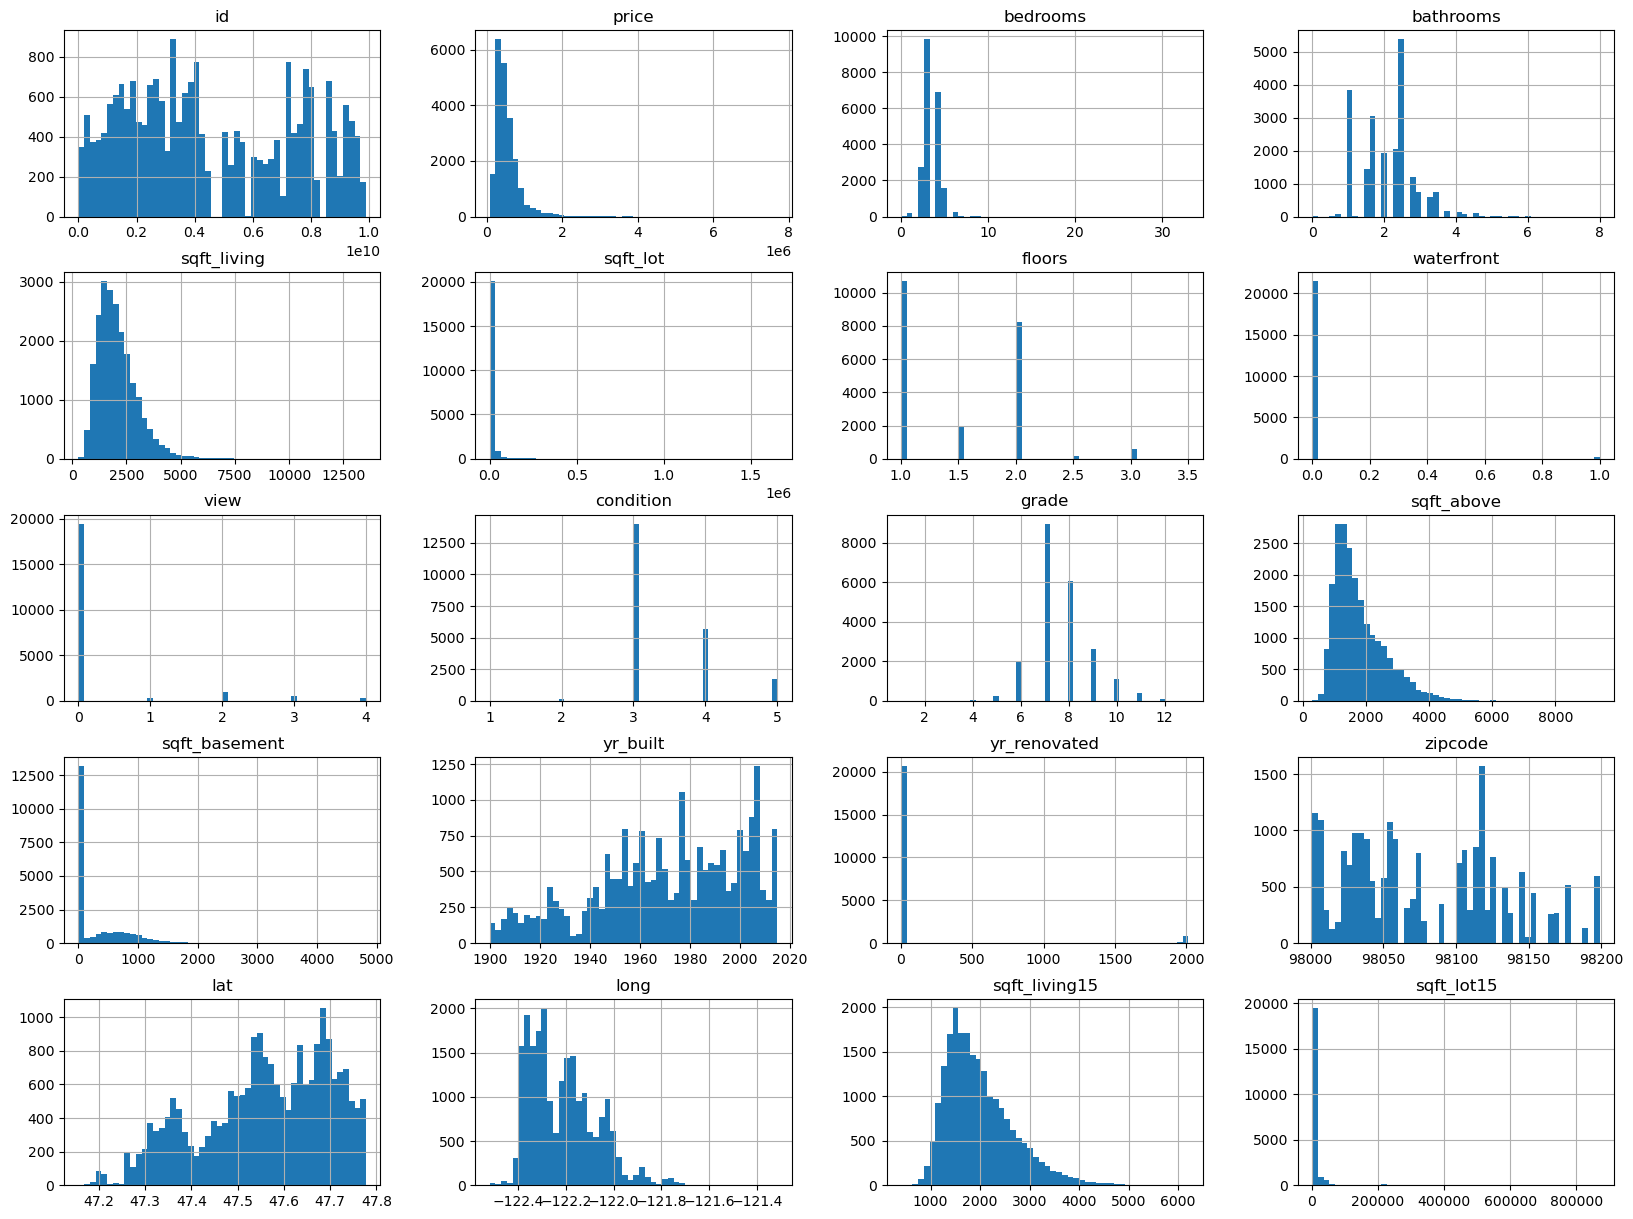

In [202]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv(r'/Users/simone/Workspace/university-stuff/machine_learning/houses_reg/kc_house_data.csv')
data.hist(bins=50, figsize=(20,15))

In [203]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [204]:
corr_matrix = data.corr()
print(corr_matrix["price"].sort_values(ascending=False))

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


/var/folders/t6/dqcsncns6j90y53rf6v6ydxc0000gn/T/ipykernel_13499/1805909693.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


In [205]:
def split_train_test(data, test_ratio, seed=42):
    np.random.seed(seed)
    shuffled_indices = np.random.permutation(len(data)) 
    test_set_size = int(len(data) * test_ratio) 
    test_indices = shuffled_indices[:test_set_size] 
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [206]:
chosen_data = data[["price", "sqft_living", "grade", "sqft_above", "bathrooms", "view", "sqft_basement", "bedrooms"]]

In [207]:
train_set, test_set = split_train_test(chosen_data, 0.2)
print(np.shape(train_set))

(17291, 8)


In [208]:
features = train_set.drop("price", axis=1).to_numpy()
print("features: ", np.shape(features))
Y = train_set["price"].to_numpy()
print("out: ", np.shape(Y))

weights = np.zeros(len(features[0]), dtype='float')
print("weights", np.shape(weights))


features:  (17291, 7)
out:  (17291,)
weights (7,)


In [238]:
phi = features
epochs = 100000
alpha = 0.4
lmbd = 0.0001

for _ in range(epochs):
    pred = np.matmul(phi, weights, dtype='float')
    err = Y - pred

    grad = -2 * np.matmul(phi.transpose(), err, dtype='float')
    grad_sq = np.square(grad)
    norm_factor = np.sqrt(grad_sq.sum(axis=0, dtype='float'))

    weights = (1 - 2 * alpha * lmbd) * weights - alpha * (grad /norm_factor)

print(weights)

[ 180.94153121  300.84346075   76.91353291  -63.9398574   713.35163915
  104.0279983  -595.50481806]


In [254]:
samples = test_set.drop("price", axis=1).to_numpy()
outs = test_set["price"].to_numpy()
avg_err = (outs - np.matmul(samples, weights)).sum(axis=0, dtype='float') / len(samples)

print("average error: ", avg_err)

average error:  -1688.240157657151
